# <a id="1"> PROJET MACHINE LEARNING</a> 

# <a id="1"> Introduction</a> 


## <a id="1"> Problematique</a>

L'analyse et la prévision des tendances boursières sont essentielles pour les investisseurs et les analystes financiers. Le suivi des prix des actions et des volumes échangés permet d'identifier les tendances du marché et d'optimiser les stratégies d'investissement.

## <a id="1"> Objectif</a>

L'objectif est d'analyser l'évolution du prix des actions de Microsoft en utilisant des indicateurs tels que le prix d'ouverture, le plus haut, le plus bas, le cours de clôture ajusté et le volume des transactions. Ces données peuvent être utilisées pour la prévision des tendances boursières et le développement de modèles de machine learning pour la prise de décision

## <a id="1"> Description</a>

La base de données que nous allons nous pencher sur des décennies de données boursières Microsoft (Microsoft Data). Cet ensemble de données s'étend de 1986 à un avenir proche (2025) et offre une occasion intéressante d'explorer les tendances boursières, les schémas statistiques et même de faire une prédiction rudimentaire du cours de clôture de demain. Même si les marchés sont complexes et pleins de surprises (comme la vie), nos differentes modèles nous offriraient des perspectives intéressantes.

Voici une description détaillée des différentes variables de la base de données:

| Variable                  | Description                                       |
| ------------------------- | ------------------------------------------------- |
| **Date**                      | date                                              |
| **Open**                      | Cours à l'ouverture du marché                     |
| **High**                      | Cours le plus élevé de la journée                 |
| **Low**                       | Cours le plus bas de la journée                   |
|**Close**                     | Cours de clôture, ajusté des fractionnements      |
| **Adj Close**                 |Cours de clôture après ajustements pour tous les fractionnements et distributions de dividendes applicables. Les données sont ajustées à l'aide de multiplicateurs de fractionnement et de dividendes appropriés, conformément aux normes du Centre de recherche sur les prix des titres (CRSP).  |
| **Volume**                    | Nombre d'actions négociées ce jour-là             |


# <a id="4"> DATA PREPROCESSING </a>

In [6]:
import pandas as pd
data=pd.read_csv('MSFT_1986-03-13_2025-02-04.csv')
data.shape

(9800, 7)

 le data compte 9800 lignes et 07 colonnes. C'est donc un small dataset. Transformons le alors en large dataset ###

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Charger les données
df = pd.read_csv("MSFT_1986-03-13_2025-02-04.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

# Compléter les jours manquants
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(date_range)
df = df.interpolate()

# Sauvegarder le dataset après interpolation
interpolated_filename = "MSFT_1986-03-13_2025-02-04.csv (1)"
df.reset_index(inplace=True)
df.rename(columns={"index": "Date"}, inplace=True)
df.to_csv(interpolated_filename, index=False)
print(f"Le fichier interpolé a été sauvegardé sous le nom '{interpolated_filename}'.")

# Recalculer le nombre de lignes après interpolation
current_rows = len(df)

# Vérifier si des lignes supplémentaires sont nécessaires
if current_rows >= 11000:
    print("Le dataset contient déjà", current_rows, "lignes après interpolation, aucune extension nécessaire.")
else:
    # Nombre de lignes manquantes
    missing_rows = 11000 - current_rows
    last_date = df["Date"].iloc[-1]

    # Générer de nouvelles dates
    new_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=missing_rows, freq='D')

    # Extrapoler les valeurs futures
    X = np.array(range(len(df))).reshape(-1, 1)
    y = df["Close"].values

    model = LinearRegression()
    model.fit(X, y)

    X_future = np.array(range(len(df), len(df) + missing_rows)).reshape(-1, 1)
    y_future = model.predict(X_future)

    # Créer un DataFrame pour les nouvelles valeurs
    future_df = pd.DataFrame(index=new_dates)
    future_df["Close"] = y_future
    future_df[["Open", "High", "Low", "Adj Close", "Volume"]] = np.nan

    # Ajouter les nouvelles lignes et interpoler
    final_df = pd.concat([df.set_index("Date"), future_df])
    final_df = final_df.interpolate()

    # Sauvegarder le fichier final avec un nom différent
    final_filename = "MSFT_extended_11000.csv"
    final_df.reset_index(inplace=True)
    final_df.rename(columns={"index": "Date"}, inplace=True)
    final_df.to_csv(final_filename, index=False)

    print(f"Le fichier étendu a été créé avec succès sous le nom '{final_filename}'.")


Le fichier interpolé a été sauvegardé sous le nom 'MSFT_1986-03-13_2025-02-04.csv (1)'.
Le dataset contient déjà 14208 lignes après interpolation, aucune extension nécessaire.


#### on a utlise l'interpolation pour obtenir un large dataset vu que dans le data preccedent certaines journees n'etaient as repertoriees

### A noter que ici les jours feriees sont inclus sans cela on a 10148 lignes

In [18]:
data = pd.read_csv("MSFT_1986-03-13_2025-02-04.csv (1)") 
data.shape

(14208, 7)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14208 entries, 0 to 14207
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14208 non-null  object 
 1   Open       14208 non-null  float64
 2   High       14208 non-null  float64
 3   Low        14208 non-null  float64
 4   Close      14208 non-null  float64
 5   Adj Close  14208 non-null  float64
 6   Volume     14208 non-null  float64
dtypes: float64(6), object(1)
memory usage: 777.1+ KB


# <a id="1"> Missing Value & Duplicate Value Check </a> 

In [24]:
pd.DataFrame(df.isna().sum().reset_index(name='Na'))

,index,Na
0,Date,0
1,Open,0
2,High,0
3,Low,0
4,Close,0
5,Adj Close,0
6,Volume,0


In [26]:
df.duplicated().sum()

0

il n'y a pas de de missing data ni de valeur duplicate

In [29]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059827,1.031789e+09
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.061963,3.081600e+08
2,1986-03-15,0.098379,0.102720,0.098379,0.101273,0.062320,2.498304e+08
3,1986-03-16,0.099537,0.103010,0.099537,0.101852,0.062676,1.915008e+08
4,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063032,1.331712e+08


In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,14208.0,6.335984e+01,9.889308e+01,8.854200e-02,5.939453e+00,2.747917e+01,4.773500e+01,4.670000e+02
High,14208.0,6.399415e+01,9.977903e+01,9.201400e-02,6.037110e+00,2.780000e+01,4.832594e+01,4.683500e+02
Low,14208.0,6.270345e+01,9.795089e+01,8.854200e-02,5.832031e+00,2.720000e+01,4.728552e+01,4.644600e+02
Close,14208.0,6.337796e+01,9.892345e+01,9.027800e-02,5.935547e+00,2.751000e+01,4.775000e+01,4.675600e+02
Adj Close,14208.0,5.763811e+01,9.895156e+01,5.555367e-02,3.652511e+00,1.928997e+01,4.020207e+01,4.657864e+02
Volume,14208.0,5.566047e+07,3.663462e+07,2.304000e+06,3.158636e+07,4.907010e+07,6.923160e+07,1.031789e+09


***On va se concentrer par la suite a la colonne Close car c'est l'indicateur clé du marché, largement utilisé pour analyser et prédire les tendances boursières.Il représente la dernière valeur échangée d'une action sur une journée donnée. Il reflète le consensus du marché à la fin de la session de trading.  Il est plus stable que High ou Low, etc qui sont souvent influences par les fluctuations journalieres.Il mieux adapté aux modèles de séries temporelles comme ARIMA.***

# <a id="1"> Verification du white noise et de random walk </a> 


 Test de Dickey-Fuller Augmenté (ADF) :
Statistique du test : 3.8128685991296782
P-valeur : 1.0
Valeurs critiques : {'1%': -3.431020117870562, '5%': -2.8618361514380988, '10%': -2.566927636285001}
La série est probablement un Random Walk (Non stationnaire selon ADF).

 Test KPSS :
Statistique du test : 8.965379125983267
P-valeur : 0.01
Valeurs critiques : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
La série est probablement non stationnaire (KPSS détecte une tendance).

 Test de Ratio de Variance :
Statistique du test (VR) : 1.017
La série montre des signes de tendance (probablement PAS un Random Walk).


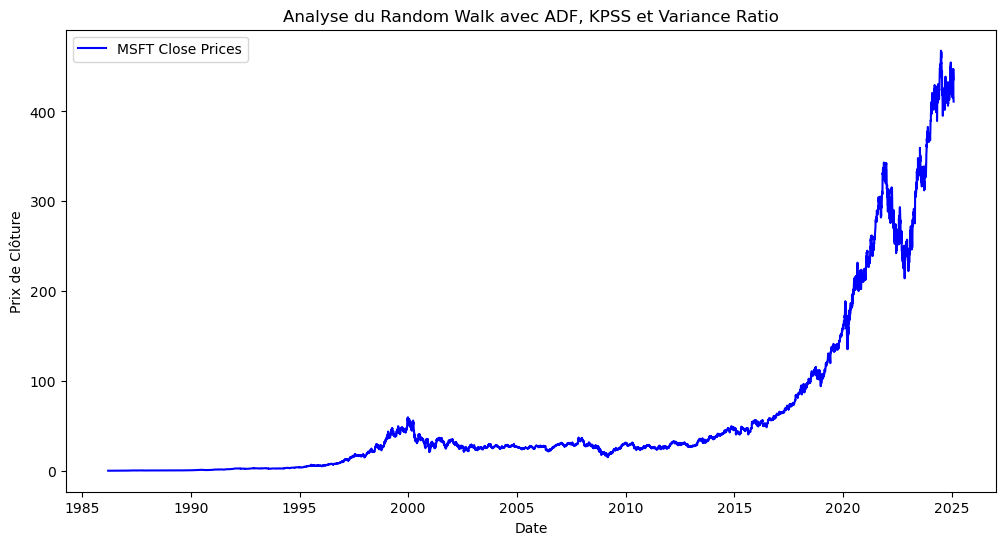

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import warnings  # Importer le module pour gérer les avertissements
import warnings

# Ignorer les warnings
warnings.filterwarnings("ignore")

# Charger le dataset MSFT
series = pd.read_csv('MSFT_1986-03-13_2025-02-04.csv', header=0, index_col='Date', parse_dates=True)

# Extraire les prix de clôture et supprimer les NaN
close_prices = series['Close'].dropna()

# Test 1 : ADF (Dickey-Fuller) - Vérifie si la série est stationnaire

#Charger le dataset MSFT
series = pd.read_csv('MSFT_1986-03-13_2025-02-04.csv', header=0, index_col='Date', parse_dates=True)

#Extraire les prix de clôture et supprimer les NaN
close_prices = series['Close'].dropna()

# Test 1 : ADF (Dickey-Fuller) - Vérifie si la série est stationnaire
adf_result = adfuller(close_prices)
print("\n Test de Dickey-Fuller Augmenté (ADF) :")
print(f"Statistique du test : {adf_result[0]}")
print(f"P-valeur : {adf_result[1]}")
print(f"Valeurs critiques : {adf_result[4]}")

if adf_result[1] > 0.05:
    print("La série est probablement un Random Walk (Non stationnaire selon ADF).")
else:
    print("La série est stationnaire (pas un Random Walk selon ADF).")

#Test 2 : KPSS - Vérifie la stationnarité autour d'une tendance
kpss_result = kpss(close_prices, regression='c', nlags="auto")
print("\n Test KPSS :")
print(f"Statistique du test : {kpss_result[0]}")
print(f"P-valeur : {kpss_result[1]}")
print(f"Valeurs critiques : {kpss_result[3]}")

if kpss_result[1] < 0.05:
    print("La série est probablement non stationnaire (KPSS détecte une tendance).")
else:
    print("La série est stationnaire selon KPSS.")

#Test 3 : Variance Ratio Test - Détection du Random Walk
def variance_ratio_test(series, lag=2):
    """
    Implémente le test de ratio de variance (VR) pour détecter un Random Walk.
    """
    series = np.log(series)  # On prend le log des prix
    diff1 = np.diff(series, n=1)  # Rendements (returns)
    
    var_1 = np.var(diff1, ddof=1)  # Variance des rendements à lag=1
    diff_lag = np.diff(series, n=lag)  # Rendements sur "lag" périodes
    var_k = np.var(diff_lag, ddof=1)  # Variance à lag=k
    
    vr = var_k / (lag * var_1)  # Ratio de variance
    return vr

#Calcul du VR Test avec lag=2
vr_stat = variance_ratio_test(close_prices, lag=2)

print("\n Test de Ratio de Variance :")
print(f"Statistique du test (VR) : {vr_stat:.3f}")

if vr_stat > 1:
    print("La série montre des signes de tendance (probablement PAS un Random Walk).")
else:
    print("La série suit un comportement aléatoire proche d'un Random Walk.")

# Visualisation des prix de clôture

plt.figure(figsize=(12,6))
plt.plot(close_prices, label="MSFT Close Prices", color='blue')
plt.xlabel("Date")
plt.ylabel("Prix de Clôture")
plt.title("Analyse du Random Walk avec ADF, KPSS et Variance Ratio")
plt.legend()
plt.show()



**La série n'est PAS un  Random Walk**

Elle est non stationnaire, mais elle suit une tendance persistante.

Si c'était un vrai Random Walk, on aurait dû voir :

ADF avec p-value > 0.05  (ok, on l'a)

KPSS avec p-value > 0.05  (or ici, c'est < 0.05, donc tendance)

Variance Ratio proche de 1.0 ou < 1  (ici, c'est >1, donc tendance)


Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  26.171136   0.003517

Les résidus NE sont PAS du bruit blanc (on rejette l'hypothèse nulle).


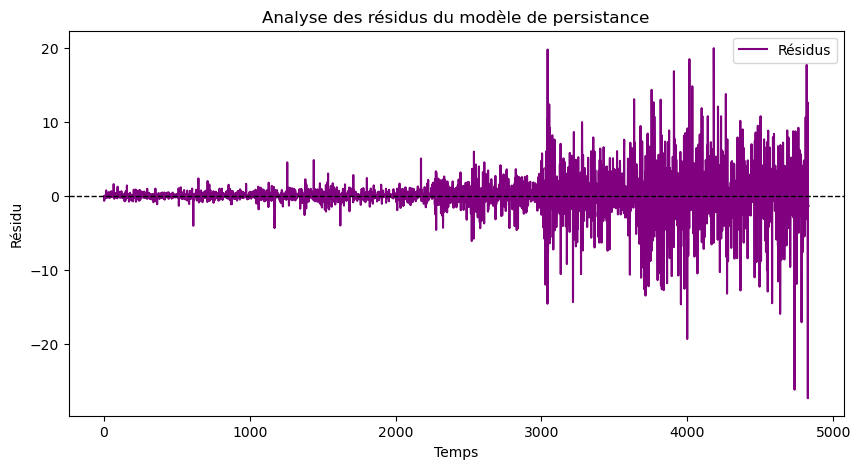

In [55]:
from pandas import read_csv, DataFrame, concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.stats.diagnostic import acorr_ljungbox  # Import du test de Ljung-Box

# Charger le dataset MSFT
series = read_csv('MSFT_1986-03-13_2025-02-04.csv (1)', header=0, index_col='Date', parse_dates=True)

# Extraire les valeurs de clôture comme un DataFrame
values = DataFrame(series['Close'].values)

# Créer un jeu de données avec un retard (t et t+1)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# Supprimer les valeurs NaN causées par le décalage
dataframe.dropna(inplace=True)

# Diviser en ensembles d'entraînement et de test
X = dataframe.values
train_size = int(len(X) * 0.66)  # 66% pour le training
train, test = X[:train_size], X[train_size:]  
train_X, train_y = train[:, 0], train[:, 1]  # Caractéristiques (t) et cible (t+1) pour le training
test_X, test_y = test[:, 0], test[:, 1]  # Caractéristiques (t) et cible (t+1) pour le test

# Modèle de persistance (prédire t+1 = t)
def model_persistence(x):
    return x

# Validation Walk-forward
predictions = [model_persistence(x) for x in test_X]

# Calcul des résidus (erreurs)
residuals = test_y - predictions

# Test de Ljung-Box (jusqu'à 10 retards)
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)

# Afficher les résultats du test
print("\nLjung-Box Test Results:")
print(lb_test)

# Interprétation de la p-valeur
p_value = lb_test['lb_pvalue'].iloc[0]
if p_value > 0.05:
    print("\nLes résidus sont du bruit blanc (on ne rejette pas l'hypothèse nulle).")
else:
    print("\nLes résidus NE sont PAS du bruit blanc (on rejette l'hypothèse nulle).")

# Tracer les résidus
pyplot.figure(figsize=(10, 5))
pyplot.plot(residuals, color='purple', label='Résidus')
pyplot.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Ligne à 0
pyplot.xlabel('Temps')
pyplot.ylabel('Résidu')
pyplot.title('Analyse des résidus du modèle de persistance')
pyplot.legend()
pyplot.show()


comme on le voit le data **n'est pas un white noise** p-value<0.05 ce qui prouve qu'il est non stationnaire

### ***ce time serie n'est ni un Random Walk ni un White Noise***

# <a id="1"> DATA VISUALISATION </a> 

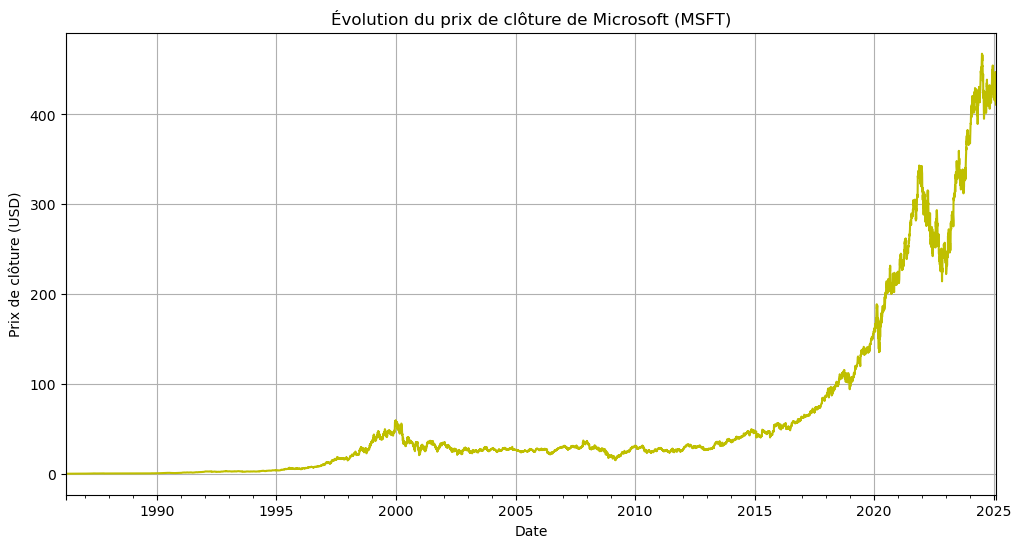

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('MSFT_1986-03-13_2025-02-04.csv (1)', parse_dates=['Date'], index_col='Date')

# Convertir les colonnes numériques
df = df.apply(pd.to_numeric, errors='coerce')

# Tracer l'évolution du prix de clôture
df['Close'].plot(figsize=(12, 6), title="Évolution du prix de clôture de Microsoft (MSFT)", color='y')

# Afficher le graphique
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.grid()
plt.show()


#### **Tendance generale du dataset au fil des annees de 1986-2025**

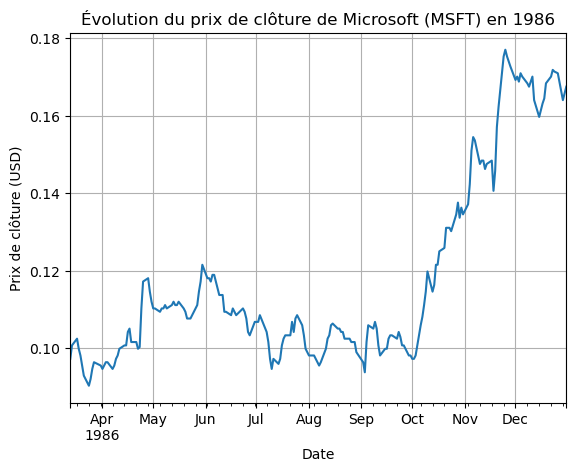

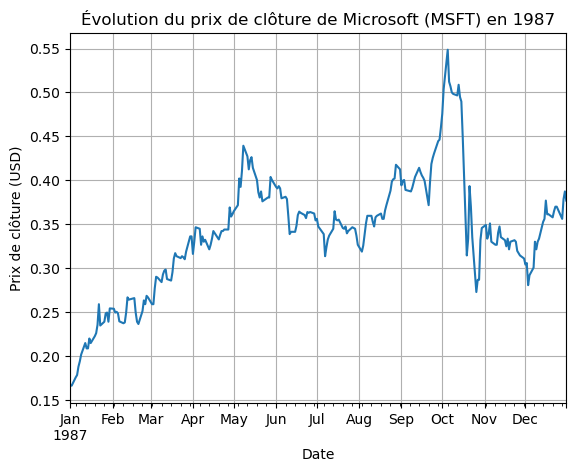

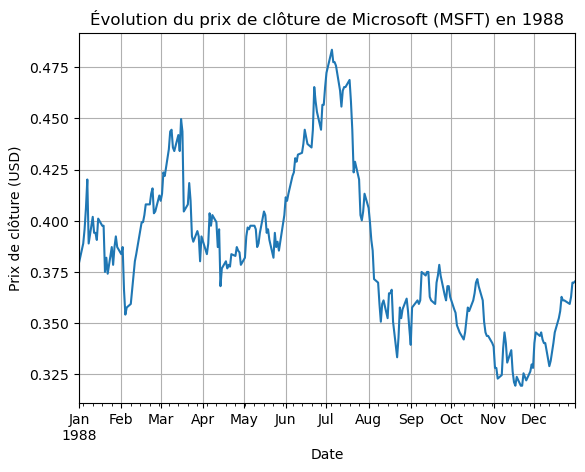

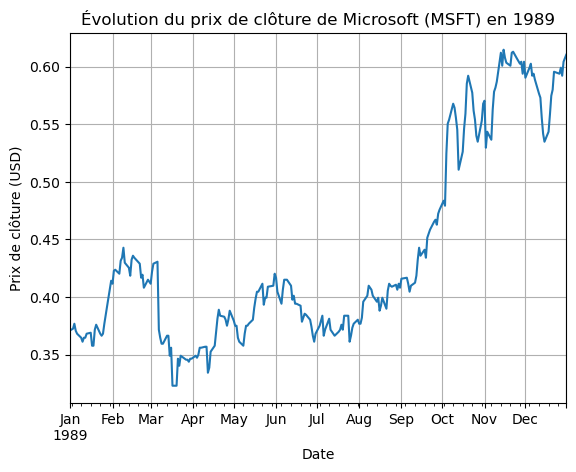

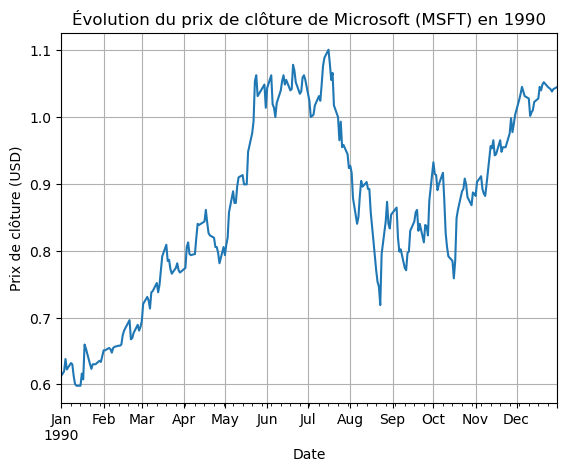

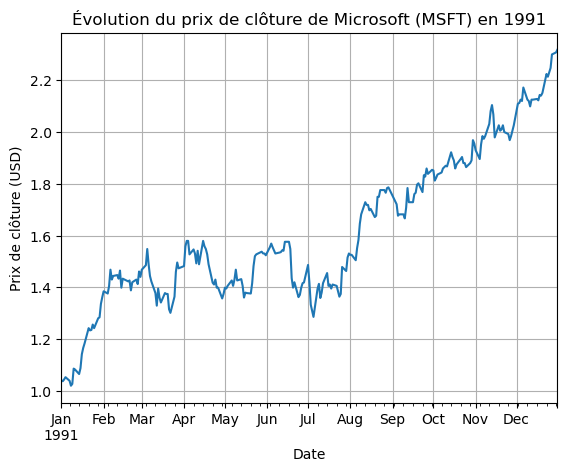

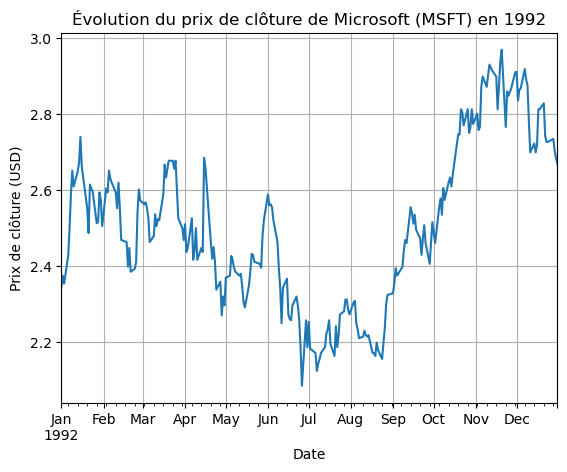

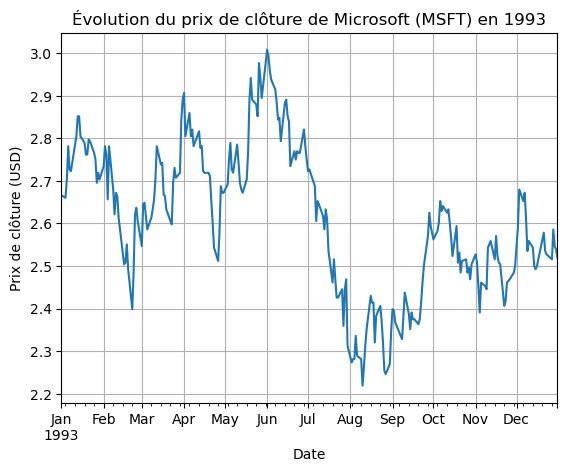

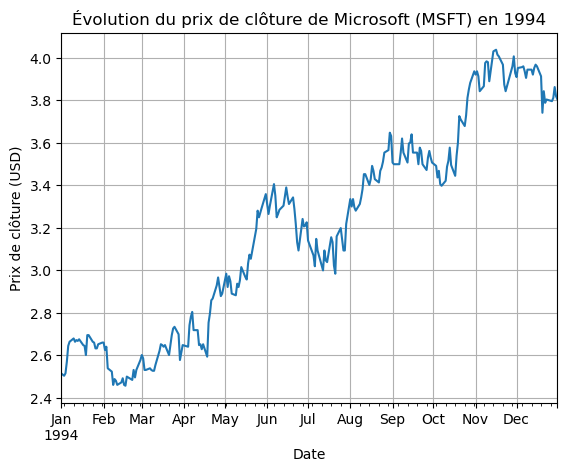

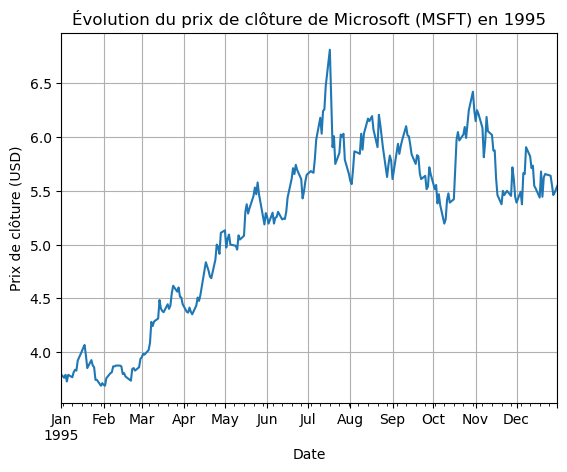

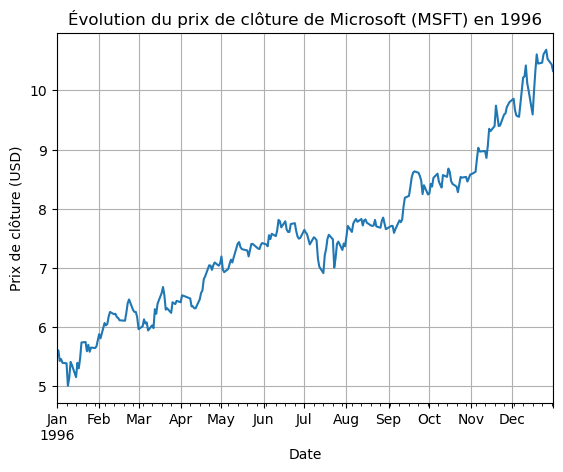

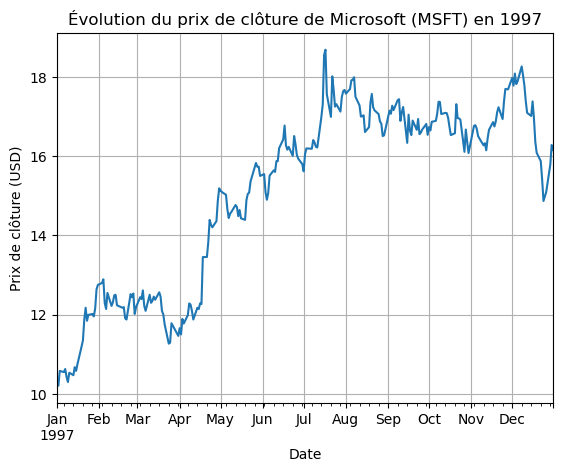

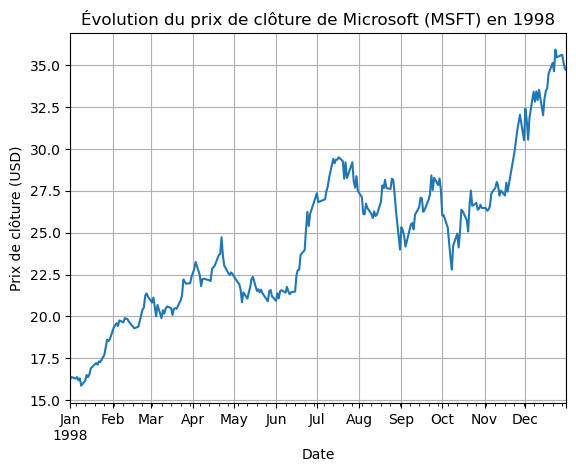

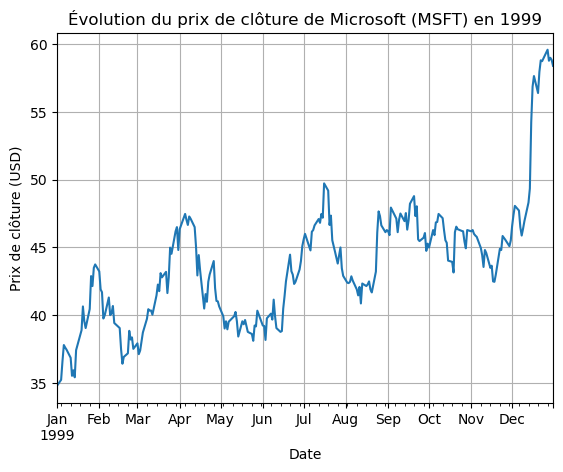

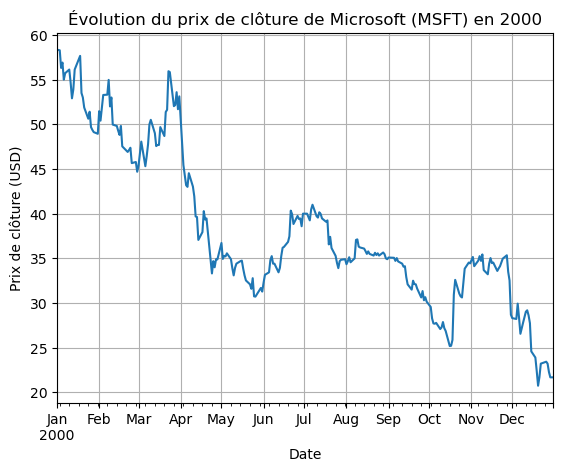

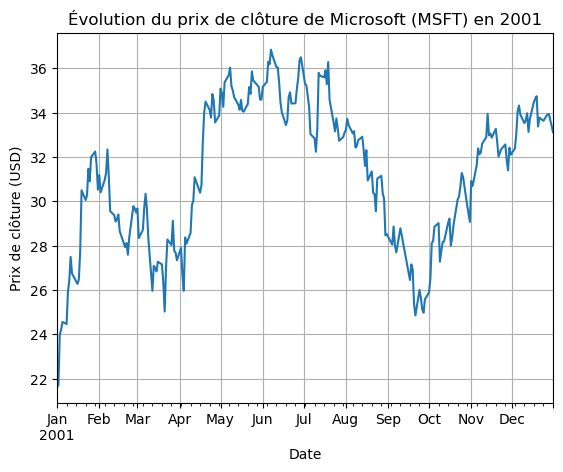

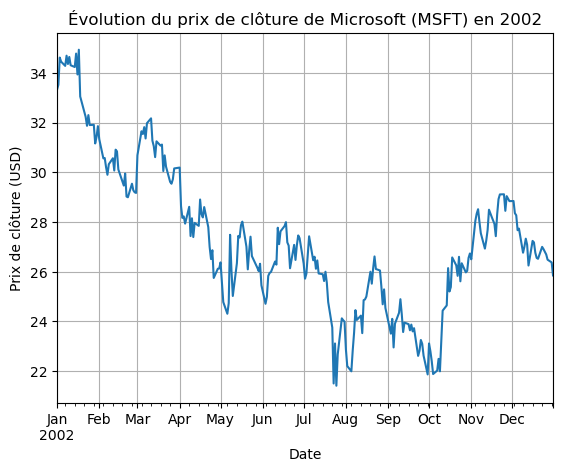

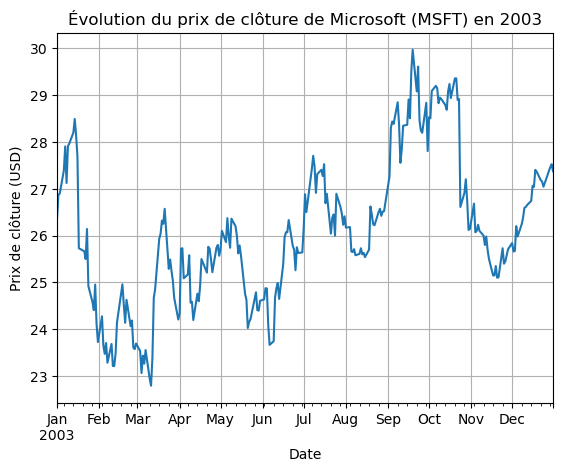

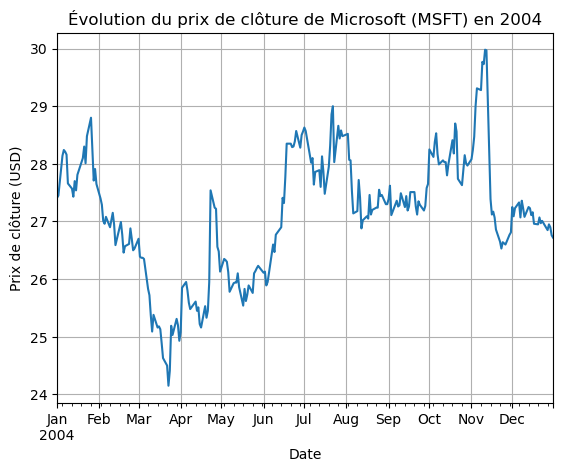

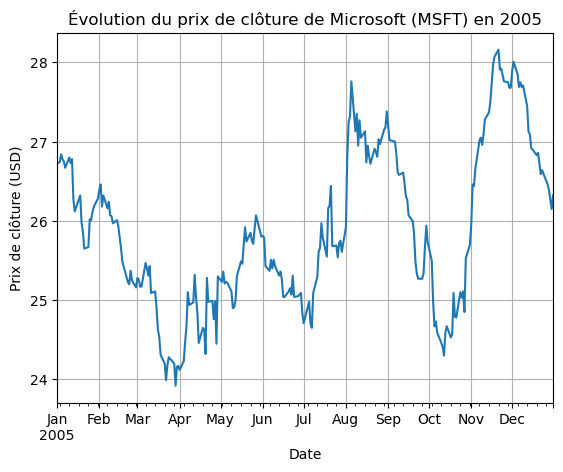

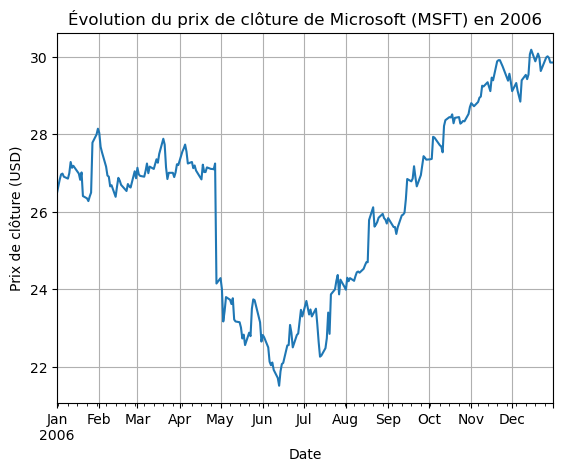

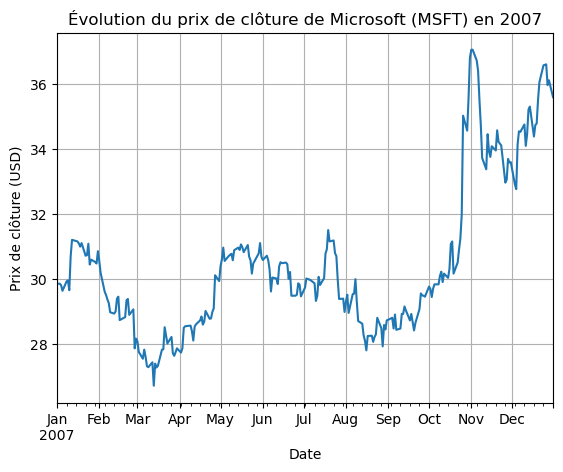

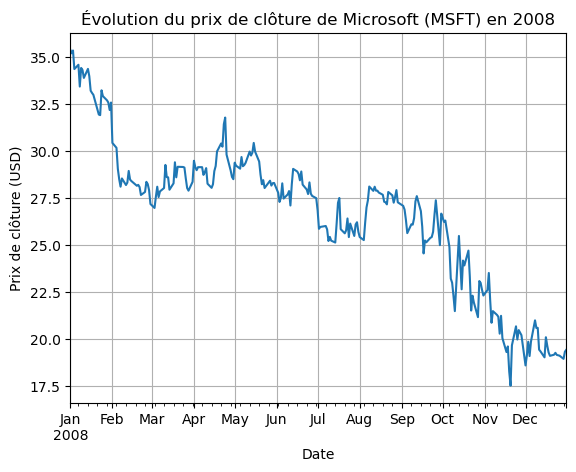

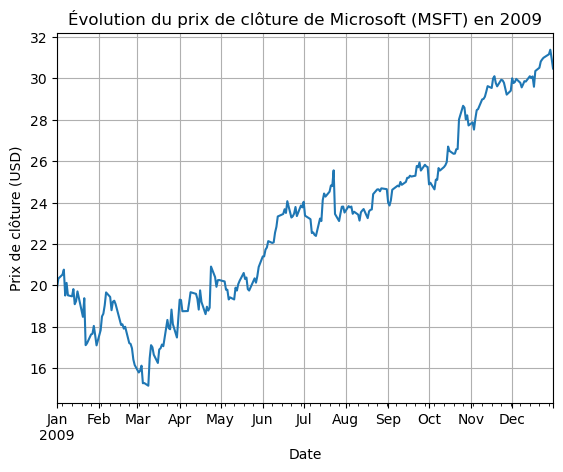

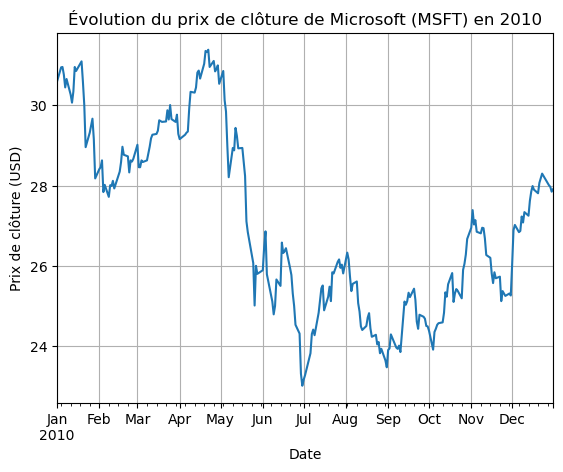

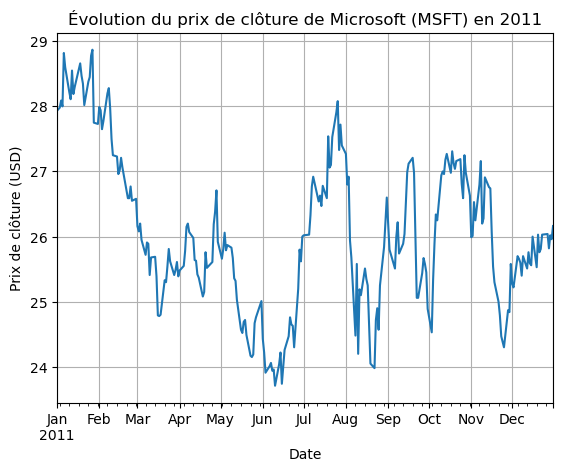

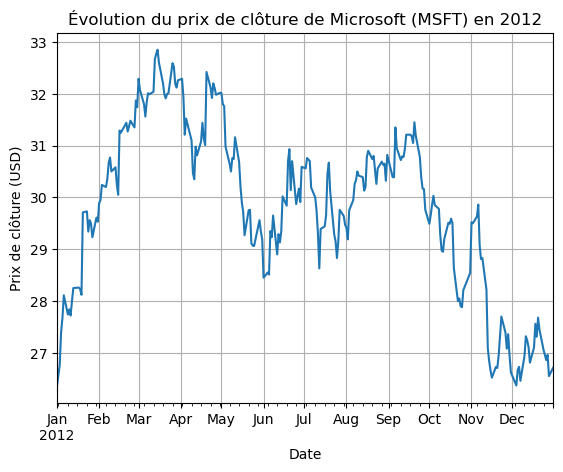

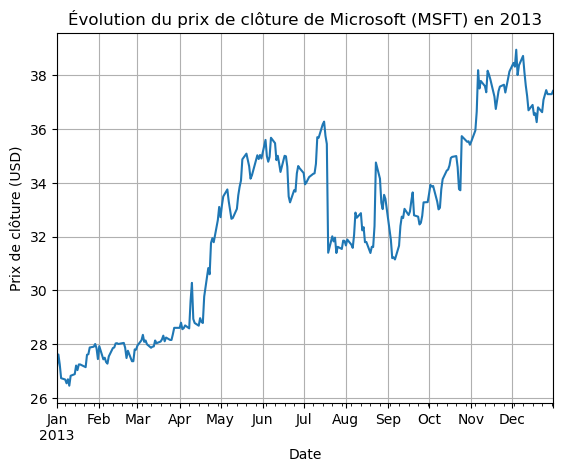

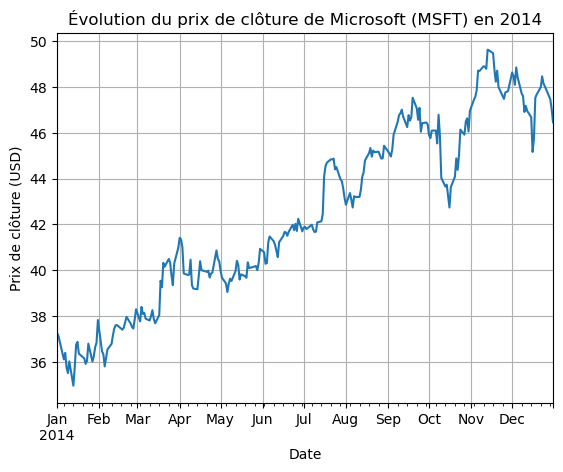

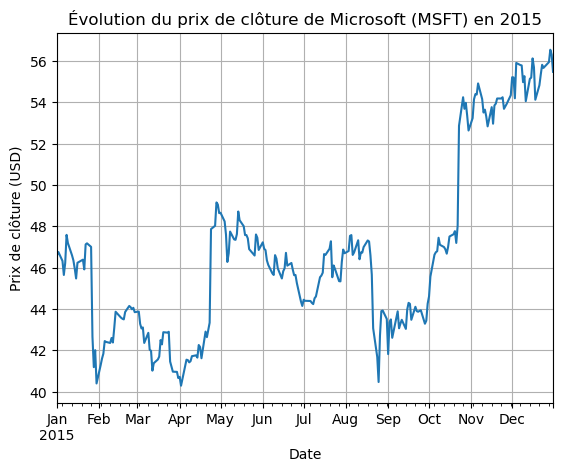

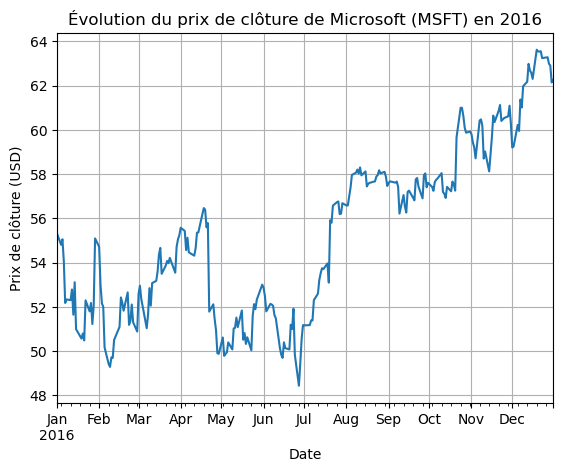

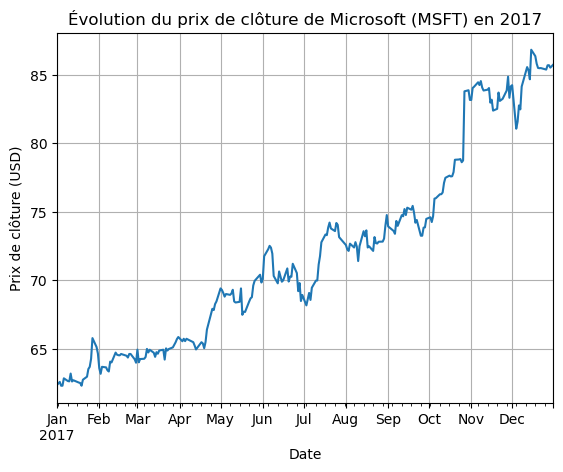

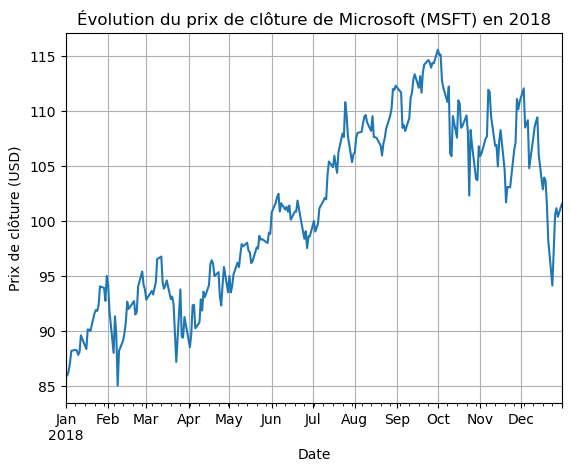

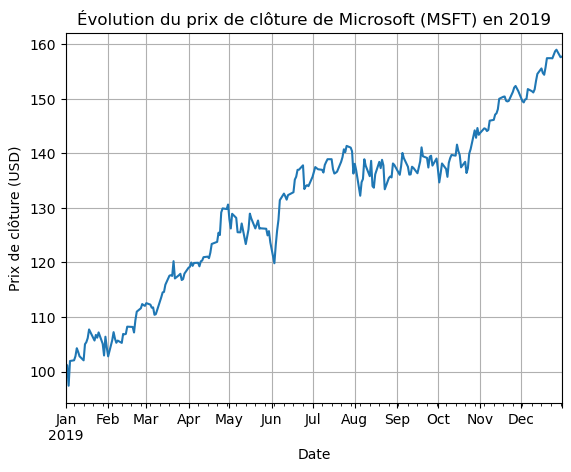

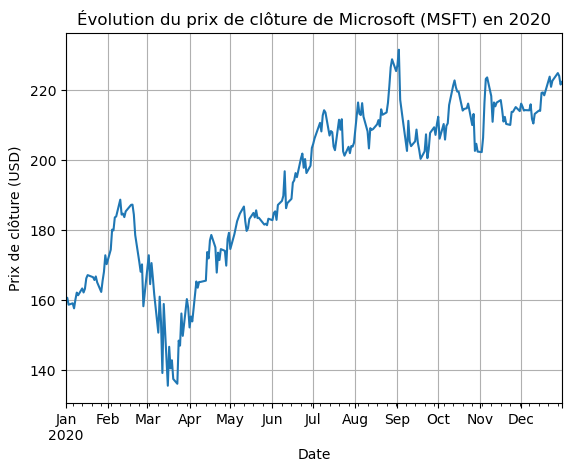

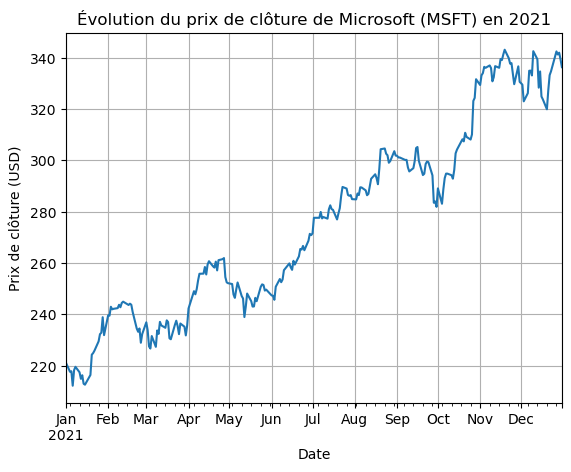

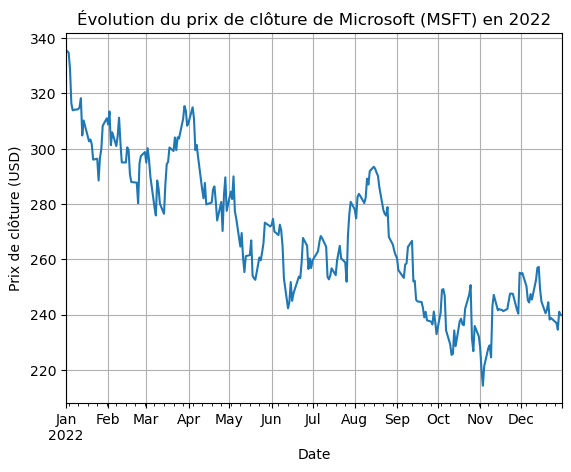

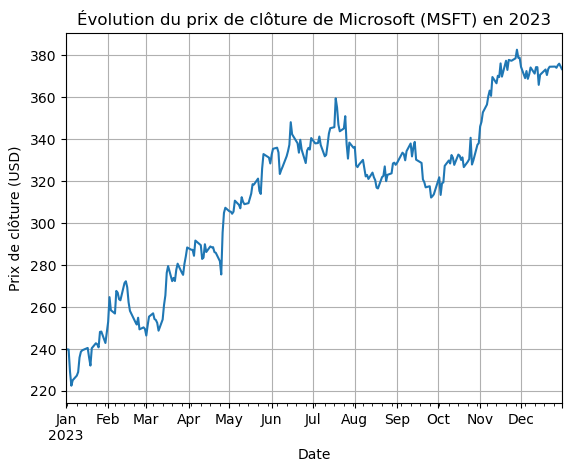

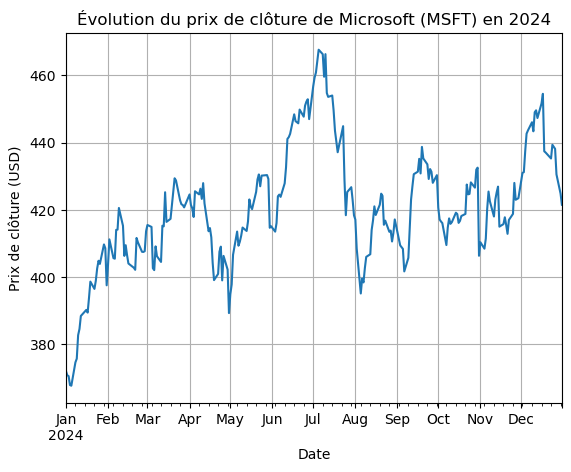

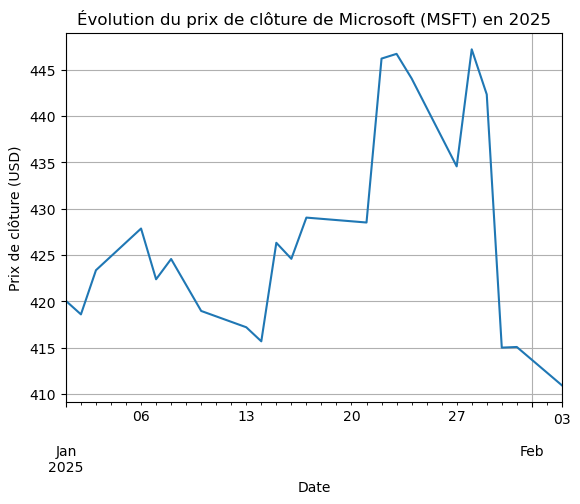

In [84]:
import pandas as pd
from pandas import Grouper
from matplotlib import pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('MSFT_1986-03-13_2025-02-04.csv (1)', parse_dates=['Date'], index_col='Date')

# Convertir les colonnes numériques
df = df.apply(pd.to_numeric, errors='coerce')

# Grouper par année
groups = df.groupby(Grouper(freq='YE'))

# Tracer les données de chaque année sur des graphiques différents
for name, group in groups:
    plt.figure()  # Créer un nouveau graphique pour chaque année
    group['Close'].plot(title=f"Évolution du prix de clôture de Microsoft (MSFT) en {name.year}")
    plt.xlabel("Date")
    plt.ylabel("Prix de clôture (USD)")
    plt.grid()
    plt.show()


##### on voit la tendance du prix de clotures depuis de chaque annees

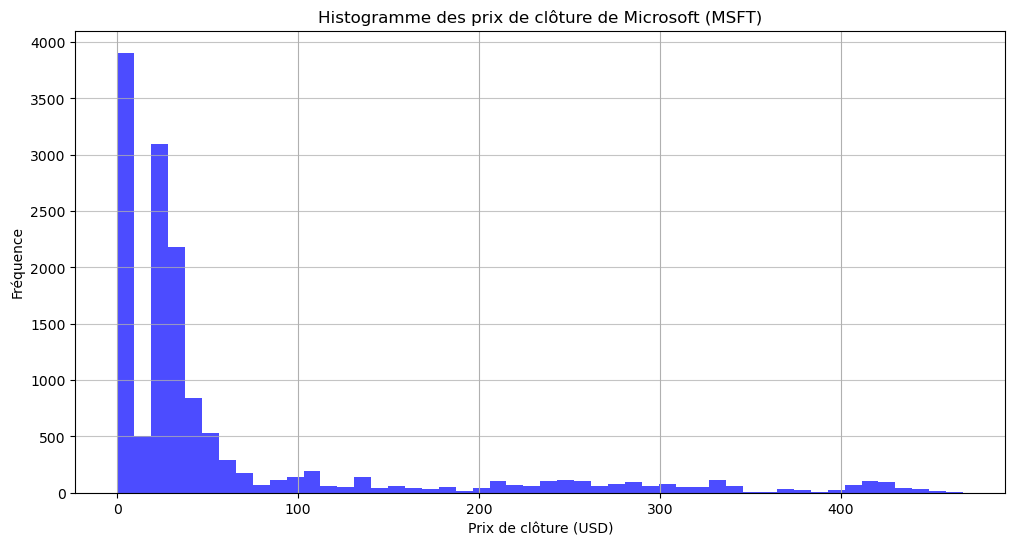

In [87]:
import pandas as pd
from matplotlib import pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('MSFT_1986-03-13_2025-02-04.csv (1)', parse_dates=['Date'], index_col='Date')

# Convertir les colonnes numériques
df = df.apply(pd.to_numeric, errors='coerce')

# Tracer l'histogramme des prix de clôture
df['Close'].hist(bins=50, figsize=(12, 6), color='b', alpha=0.7)
plt.title("Histogramme des prix de clôture de Microsoft (MSFT)")
plt.xlabel("Prix de clôture (USD)")
plt.ylabel("Fréquence")
plt.grid(axis='y', alpha=0.75)

# Afficher le graphique
plt.show()


**Avec cet histogramme, on voit l’évolution historique des prix de clôture de Microsoft, marquée par une progression à la hausse avec des fractionnements d'actions expliquant la forte concentration des prix à des niveaux plus bas. L’augmentation des prix récents s’observe à travers la traîne à droite, confirmant la croissance à long terme de l’action MSFT.**

      January    February       March       April         May        June  \
0  372.162498  403.779999  415.500000  424.570007  394.940002  414.593333   
1  370.869995  411.220001  415.306671  421.440002  397.839996  414.056661   
2  370.600006  409.363332  415.113342  420.450012  406.660004  413.519989   
3  367.940002  407.506663  414.920013  417.880005  408.953339  416.070007   
4  367.750000  405.649994  402.649994  425.519989  411.246674  424.010010   

         July      August   September     October    November    December  
0  456.730011  417.109985  413.290009  420.690002  410.369995  428.473338  
1  459.279999  408.489990  411.365005  417.130005  409.733327  430.980011  
2  460.769989  404.043325  409.440002  416.540009  409.096659  431.200012  
3  464.164993  399.596659  408.899994  416.059998  408.459991  437.420013  
4  467.559998  395.149994  408.390015  413.886668  411.459991  442.619995  


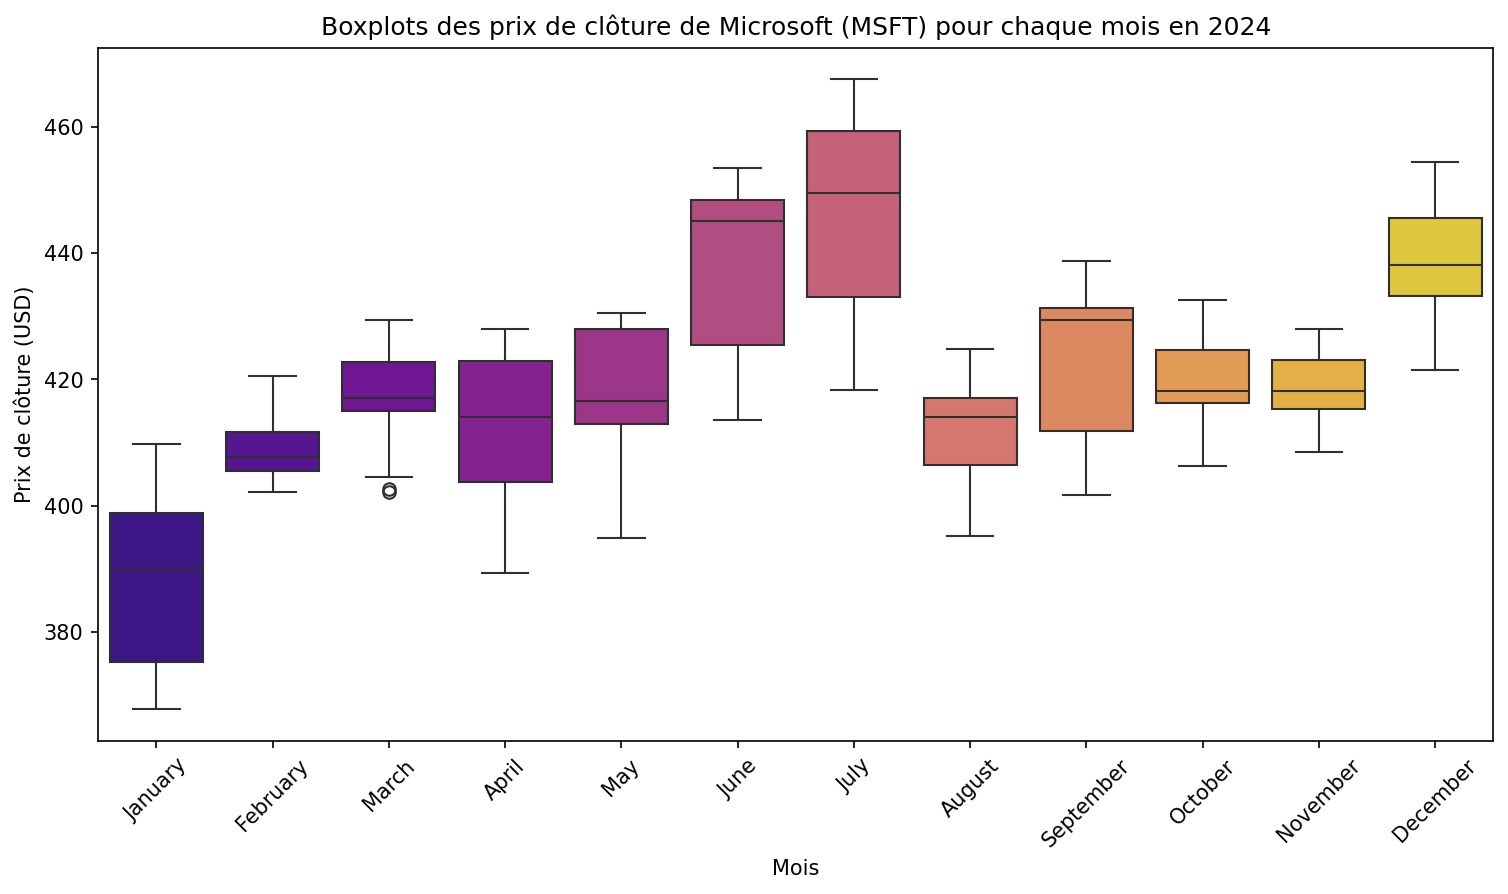

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Ajout de seaborn pour les couleurs
import warnings

# Ignorer les warnings
warnings.filterwarnings("ignore")

# Lire le fichier CSV
series = pd.read_csv(
    'MSFT_1986-03-13_2025-02-04.csv (1)',
    parse_dates=['Date'],
    index_col='Date'
)

# Convertir les colonnes numériques
series = series.apply(pd.to_numeric, errors='coerce')

# Filtrer pour l'année 2024
series_2024 = series.loc["2024"]

# Grouper par mois
groups = series_2024.groupby(pd.Grouper(freq='ME'))

# Créer un DataFrame pour stocker les données mensuelles
months = pd.DataFrame()

# Remplir le DataFrame avec les données mensuelles
for name, group in groups:
    group = group.reset_index(drop=True)  # Réinitialiser l'index pour un alignement correct
    months[name.strftime('%B')] = group['Close']  # Utiliser le nom complet du mois et la colonne 'Close'

print(months.head())

# Convertir le DataFrame en format long (melt) pour Seaborn
months_long = months.melt(var_name="Mois", value_name="Close")

# Tracer les boxplots avec Seaborn pour ajouter de la couleur
plt.figure(figsize=(12, 6), dpi=150)
sns.boxplot(x="Mois", y="Close", data=months_long, palette="plasma")  # Ajout de la palette colorée

# Ajouter des labels et un titre
plt.title('Boxplots des prix de clôture de Microsoft (MSFT) pour chaque mois en 2024')
plt.xlabel('Mois')
plt.ylabel('Prix de clôture (USD)')

# Faire pivoter les labels de l'axe x pour une meilleure visibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()


**Ce graphe montre une representation des outliers de 2024 (derniere annee la plus complete), avec une volatilité variable selon les mois. Janvier, avril, juin et juillet affichent une forte dispersion des prix, tandis que février et octobre sont plus stables. Juillet et décembre atteignent les niveaux les plus élevés, confirmant une tendance haussière. Quelques outliers indiquent des variations soudaines.** 

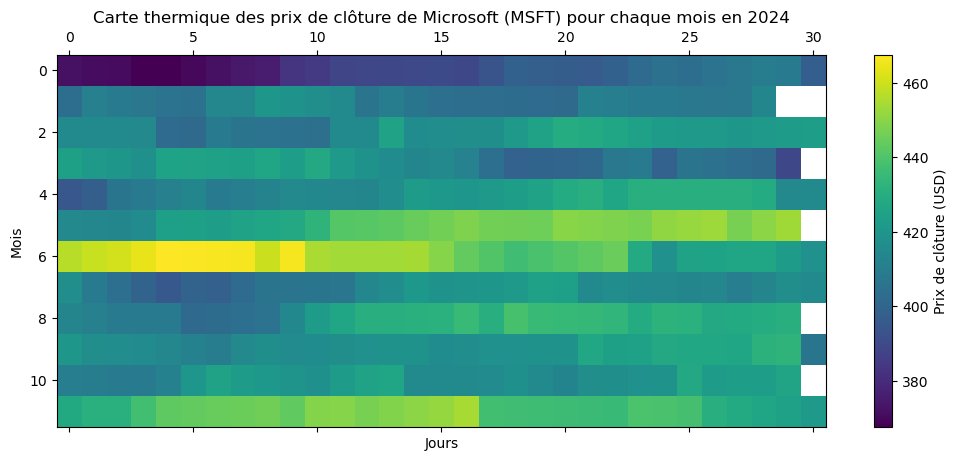

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Lire le fichier CSV
series = pd.read_csv(
    'MSFT_1986-03-13_2025-02-04.csv (1)',
    parse_dates=['Date'],
    index_col='Date'
)

# Convertir les colonnes numériques
series = series.apply(pd.to_numeric, errors='coerce')

# Filtrer pour l'année 2024
series_2024 = series.loc["2024"]

# Grouper par mois
groups = series_2024.groupby(pd.Grouper(freq='ME'))

# Créer un DataFrame pour stocker les données mensuelles
months = pd.DataFrame()

# Remplir le DataFrame avec les données mensuelles
for name, group in groups:
    group = group.reset_index(drop=True)  # Réinitialiser l'index pour un alignement correct
    months[name.strftime('%B')] = group['Close']  # Utiliser le nom complet du mois et la colonne 'Close'

# Transposer le DataFrame pour obtenir les mois en lignes et les jours en colonnes
months = months.T

# Créer la carte thermique (heatmap)
plt.matshow(months, interpolation='none', aspect='auto')

# Ajouter une barre de couleur en légende
cbar = plt.colorbar()
cbar.set_label('Prix de clôture (USD)')  # Ajouter un label à la barre de couleur

# Ajouter des labels et un titre
plt.xlabel('Jours')  # Label pour l'axe x
plt.ylabel('Mois')   # Label pour l'axe y
plt.title('Carte thermique des prix de clôture de Microsoft (MSFT) pour chaque mois en 2024')  # Ajouter un titre

# Afficher le graphique
plt.show()


**La carte thermique des prix de clôture de Microsoft en 2024 montre des variations significatives, avec des pics en jaune indiquant des sommets de prix et des creux en violet pour les baisses. Les prix oscillent entre 380 USD et 460 USD, reflétant une forte volatilité. 
A noter que on a des jours sans ouverture qui sont representes  vers la plupart du temps au jours 30.**

# <a id="4">  DATA ANALYSIS </a>

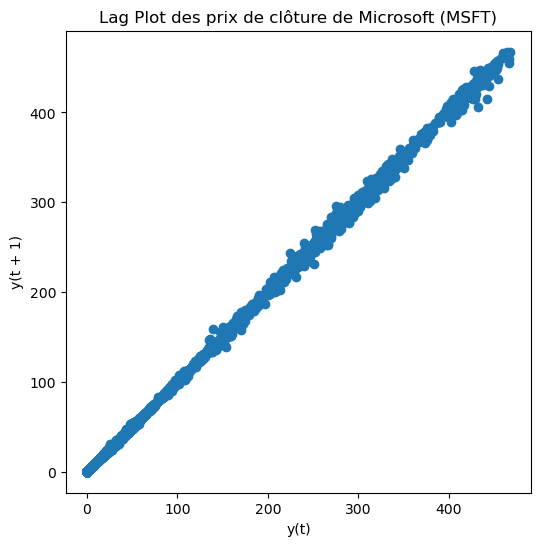

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

# Charger les données MSFT
df = pd.read_csv("MSFT_1986-03-13_2025-02-04.csv (1)", index_col='Date', parse_dates=True)

#Supprimer les valeurs manquantes si nécessaire
df = df.dropna()

#Créer un Lag Plot pour les prix de clôture
plt.figure(figsize=(6, 6))
lag_plot(df['Close'])
plt.title('Lag Plot des prix de clôture de Microsoft (MSFT)')

#Afficher le graphique
plt.show()


**on a une forte autocorrelation positive ce qui montre une grande dependance dans le temps . cela montre aussi que le time serie est non-stationnaire**

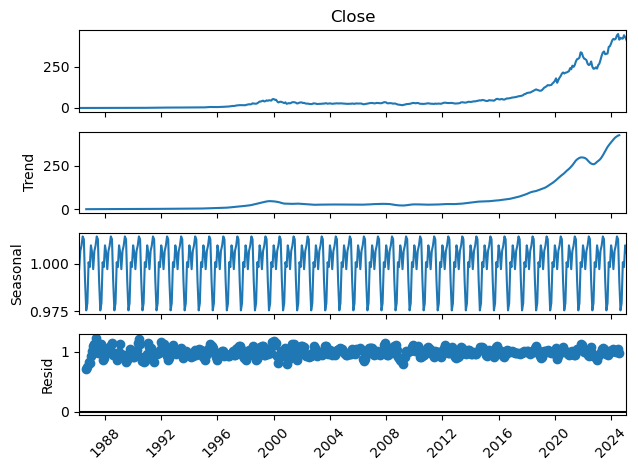

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from statsmodels.tsa.seasonal import seasonal_decompose

# Charger les données
series = read_csv('MSFT_1986-03-13_2025-02-04.csv (1)', 
                  header=0,   
                  index_col=0,
                  parse_dates=True)

# S'assurer que l'index est bien de type datetime
series.index = pd.to_datetime(series.index)

# Resampler les données pour avoir une fréquence mensuelle (moyenne des jours du mois)
series = series['Close'].resample('MS').mean()

# Effectuer la décomposition saisonnière (modèle multiplicatif)
result = seasonal_decompose(series, model='multiplicative')

# Afficher les graphiques de la décomposition
result.plot()
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()  # Ajustement du layout
plt.show()


**Avec le model multiplicative de la decomposition, on constate que les fluctuations augmentent avec le trend et on a une variance  du prix des actions est non-stationnaire**

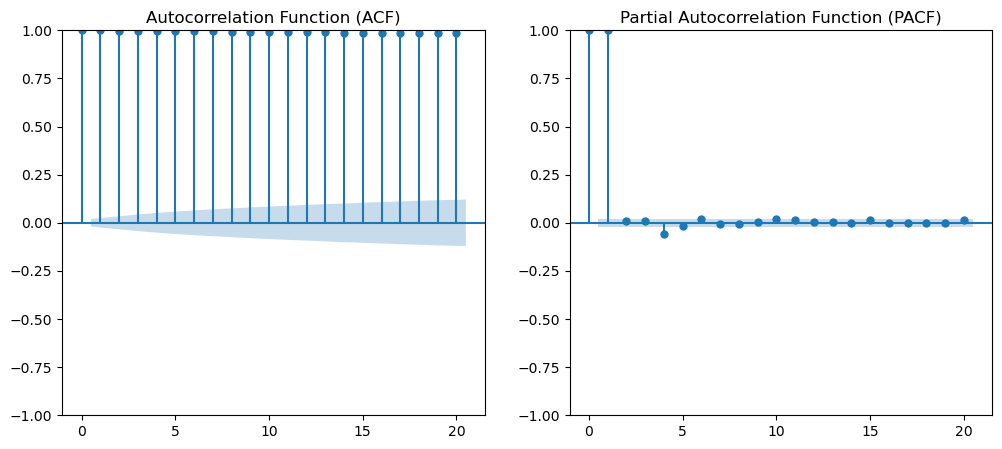

10148
conf_level
0.019456550341779687
Selected AR order (k): 1


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# **Étape 1 : Charger les données temporelles**
file_path = 'MSFT_1986-03-13_2025-02-04.csv (1)'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
series = df['Close'].squeeze()
series = series.asfreq('B')#on va exclure les jours fériés

# **Étape 2 : Tracer l'ACF et le PACF**
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Tracé ACF
sm.graphics.tsa.plot_acf(series, lags=20, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Tracé PACF
sm.graphics.tsa.plot_pacf(series, lags=20, ax=axes[1], method="ywm")
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()

# **Étape 3 : Identifier k à partir du PACF** (trouver le premier lag non significatif)
pacf_values = pacf(series, nlags=20)  # Calcul des valeurs PACF
conf_level = 1.96 / np.sqrt(len(series))  # Seuil de confiance à 95%
print(len(series))
print('conf_level')
print(conf_level)

best_k = np.argmax(np.abs(pacf_values) < conf_level) - 1  # Trouver où le PACF devient non significatif
best_k = max(1, best_k)  # S'assurer que k est au moins égal à 1

print(f"Selected AR order (k): {best_k}")

**1. Analyse de l'Autocorrelation Function (ACF) :**
**L'ACF montre une décroissance très lente avec des valeurs qui restent élevées sur plusieurs lags.**

**Cela indique une forte persistance dans les données, ce qui est un signe de non-stationnarité.**

**Cela peut suggérer un effet de tendance ou une composante saisonnière non prise en compte.**

**2. Analyse de la Partial Autocorrelation Function (PACF) :**
**Le premier lag est fortement significatif, mais les autres valeurs chutent rapidement.**

**Cela suggère qu’un modèle AR(1) (AutoRegressive d’ordre 1) pourrait être approprié après une différenciation.**

# <a id="1"> Les differentes models</a> 

## Division du dataset (train-test)

Le data sera divisé en Train et Test. Les pourcentages typiques pour le train/test sont 66/33 

- **Le train (66 %)** est utilisé pour apprendre à l'algorithme d'apprentissage automatique à faire des prédictions précises.
- **Le test (33 %)** est utilisé pour évaluer la performance de l'algorithme après l'apprentissage.

## Resampling du dataset

On va faire le resampling du data avec les frequences **Business Day** c'est-a dire qu'on va garder uniquement les 05 jours ouvrables.


# <a id="1"> 1-PERSISTENCE MODEL </a> 

In [17]:
from pandas import read_csv, DataFrame, concat
from sklearn.metrics import mean_squared_error
from math import sqrt

# Charger le dataset MSFT
series = read_csv('MSFT_1986-03-13_2025-02-04.csv (1)', header=0, index_col='Date', parse_dates=True)

# Extraire les valeurs de clôture comme un DataFrame
values = DataFrame(series['Close'].values)

# Créer un jeu de données avec un retard (t et t+1)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# Afficher les 5 premières lignes 
print("Lagged Dataset:")
print(dataframe.head(5))

# Diviser en ensembles d'entraînement et de test
X = dataframe.values
train_size = int(len(X) * 0.66)  # 66% pour le training
train, test = X[1:train_size], X[train_size:]  # Ignorer la première ligne (NaN en raison du retard)
train_X, train_y = train[:, 0], train[:, 1]  # Caractéristiques (t) et cible (t+1) pour le training
test_X, test_y = test[:, 0], test[:, 1]  # Caractéristiques (t) et cible (t+1) pour le test

# Modèle de persistance (prédire t+1 = t)
def model_persistence(x):
    return x

# Validation Walk-forward
predictions = [model_persistence(x) for x in test_X]

# Calcul des erreurs
mse = mean_squared_error(test_y, predictions)  # Mean Squared Error
rmse = sqrt(mse)  # Root Mean Squared Error

# Afficher les erreurs
print(f'Test MSE: {mse:.3f}')
print(f'Test RMSE: {rmse:.3f}')


Lagged Dataset:
          t       t+1
0       NaN  0.097222
1  0.097222  0.100694
2  0.100694  0.101273
3  0.101273  0.101852
4  0.101852  0.102431
Test MSE: 6.200
Test RMSE: 2.490


**Avec le Persistence Model**

**RMSE:2.49**

**MSE:6.2**

# <a id="1"> 2-AUTOREGRESSIVE MODEL </a> 

In [5]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import numpy as np

# Charger et prétraiter les données
file_path = 'MSFT_1986-03-13_2025-02-04.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Assurer une fréquence Business Days et gérer les valeurs manquantes
df = df.asfreq('B')
df['Close'] = df['Close'].ffill()

# Extraire la colonne 'Close'
series = df['Close']

# Créer un dataset avec un décalage (t, t+1)
dataframe = pd.concat([series.shift(1), series], axis=1)
dataframe.columns = ['t', 't+1']
dataframe.dropna(inplace=True)

# Diviser les données en train et test (dernières 7 valeurs pour le test)
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_y = train[:, 1]  # Utiliser t+1 comme target
test_y = test[:, 1]

# Trouver le meilleur lag en minimisant le RMSE
best_lag = 1
best_rmse = float('inf')
best_mse = float('inf')
best_predictions = []

# Contraindre max_lags selon la taille du train set
max_possible_lags = min(100, len(train_y) // 2)

for lag in range(1, max_possible_lags + 1):
    try:
        model = AutoReg(train_y, lags=lag)
        model_fit = model.fit()
        predictions = model_fit.predict(
            start=len(train_y),
            end=len(train_y) + len(test_y) - 1,
            dynamic=False
        )
        if len(predictions) != len(test_y):
            continue

        mse = mean_squared_error(test_y, predictions)
        rmse = sqrt(mse)

        if rmse < best_rmse:
            best_rmse = rmse
            best_mse = mse
            best_lag = lag
            best_predictions = predictions

        print(f"Lag {lag}: MSE = {mse:.3f}, RMSE = {rmse:.3f}")

    except Exception as e:
        print(f"Échec à lag {lag}: {str(e)}")
        continue

# Résultats du meilleur modèle
print(f"\nMeilleur Lag: {best_lag}")
print(f"MSE minimum: {best_mse:.3f}")
print(f"RMSE minimum: {best_rmse:.3f}")


Lag 1: MSE = 542.953, RMSE = 23.301
Lag 2: MSE = 544.324, RMSE = 23.331
Lag 3: MSE = 521.484, RMSE = 22.836
Lag 4: MSE = 519.866, RMSE = 22.801
Lag 5: MSE = 519.462, RMSE = 22.792
Lag 6: MSE = 537.108, RMSE = 23.176
Lag 7: MSE = 515.518, RMSE = 22.705
Lag 8: MSE = 516.071, RMSE = 22.717
Lag 9: MSE = 501.083, RMSE = 22.385
Lag 10: MSE = 522.558, RMSE = 22.860
Lag 11: MSE = 520.054, RMSE = 22.805
Lag 12: MSE = 520.625, RMSE = 22.817
Lag 13: MSE = 521.002, RMSE = 22.825
Lag 14: MSE = 529.447, RMSE = 23.010
Lag 15: MSE = 521.758, RMSE = 22.842
Lag 16: MSE = 521.374, RMSE = 22.834
Lag 17: MSE = 522.020, RMSE = 22.848
Lag 18: MSE = 521.424, RMSE = 22.835
Lag 19: MSE = 521.754, RMSE = 22.842
Lag 20: MSE = 531.178, RMSE = 23.047
Lag 21: MSE = 530.526, RMSE = 23.033
Lag 22: MSE = 529.014, RMSE = 23.000
Lag 23: MSE = 521.287, RMSE = 22.832
Lag 24: MSE = 523.100, RMSE = 22.871
Lag 25: MSE = 527.019, RMSE = 22.957
Lag 26: MSE = 529.873, RMSE = 23.019
Lag 27: MSE = 533.620, RMSE = 23.100
Lag 28: MS

**Cela signifie que le modèle AutoReg utilise les 97 valeurs précédentes pour prédire la valeur suivante.**

**Le modèle AutoReg a bien trouvé un lag optimal qui minimise l'erreur.**

**MSE minimum: 457.663**
**RMSE minimun: 21.393**3


# <a id="1"> 3-ARIMA</a> 

**On va faire un grid search pour savoir le meileurs parametres du ARIMA**

In [6]:
import pandas as pd
import numpy as np
import itertools
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Ignorer les warnings
warnings.filterwarnings("ignore")

# Charger les données MSFT
file_path = 'MSFT_1986-03-13_2025-02-04.csv (1)'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Garder uniquement la colonne 'Close' et supprimer les valeurs manquantes
df = df[['Close']].dropna()

# Définir une fréquence
df = df.asfreq('B')  # 'B' pour jours ouvrables

# Combler les valeurs manquantes avec interpolation
df['Close'] = df['Close'].interpolate(method='linear')

# Vérifier qu'il n'y a plus de NaN
print("NaN restants après gestion :", df.isnull().sum())

# Test de stationnarité ADF
adf_test = adfuller(df['Close'])
print("Test ADF avant différenciation :")
print(f"Statistique du test : {adf_test[0]}")
print(f"P-valeur : {adf_test[1]}")

# Appliquer une différenciation si p-valeur > 0.05
d = 0
if adf_test[1] > 0.05:
    df['Close'] = df['Close'].diff().dropna()
    d = 1

# Split train/test (66% training)
train_size = int(len(df) * 0.66)
train, test = df[:train_size], df[train_size:]

# Définition des plages de valeurs pour p et q
p_values = range(0, 4)
q_values = range(0, 4)
best_aic = float("inf")
best_order = None
best_model = None

# Recherche des meilleurs paramètres (p, d, q)
for p, q in itertools.product(p_values, q_values):
    try:
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
            best_model = model_fit
    except:
        continue

print(f"Meilleur modèle ARIMA{best_order} avec AIC : {best_aic:.3f}")

# Prédictions avec le meilleur modèle
predictions = best_model.forecast(steps=len(test))

# Calcul des erreurs
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f"\nMSE : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")


NaN restants après gestion : Close    0
dtype: int64
Test ADF avant différenciation :
Statistique du test : 3.554722530910475
P-valeur : 1.0
Meilleur modèle ARIMA(2, 1, 3) avec AIC : 9368.629

MSE : 9.849
RMSE : 3.138


**Les meileurs (p,d,q) sont (2,1,3):**

**2: lags**

**1: difference**

**3: moving average**

**RMSE=3.138**

**MSE=9.849**

# <a id="1"> 4-SARIMA</a> 

**Le SARIMA (Seasonal Autoregressive Integrated Moving Average) est une extension du modèle ARIMA, qui ajoute une composante saisonnière pour mieux gérer les séries temporelles avec des motifs répétitifs (mensuels, trimestriels, annuels…).**

In [1]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Ignorer les warnings
warnings.filterwarnings("ignore")

# Charger les données
file_path = 'MSFT_1986-03-13_2025-02-04.csv (1)'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Garder uniquement la colonne 'Close' et fixer la fréquence des jours ouvrés
df = df[['Close']].dropna().asfreq('B')

# Vérifier la stationnarité avec le test ADF
adf_test = adfuller(df['Close'])
print(f"Statistique ADF : {adf_test[0]}, P-valeur : {adf_test[1]}")

# Appliquer une différenciation si nécessaire
d = 0
if adf_test[1] > 0.05:
    df['Close'] = df['Close'].diff().dropna()
    d = 1

# Définir directement les meilleurs paramètres
best_order = (2, 1, 2)
best_seasonal_order = (2, 1, 1, 5)

# Ajuster le modèle avec les meilleurs paramètres
model = SARIMAX(df, order=best_order, seasonal_order=best_seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
best_model = model.fit()

print(f"Meilleur modèle SARIMA {best_order} x {best_seasonal_order} avec AIC : {best_model.aic:.3f}")

# Séparer les données en train et test (66% train)
train_size = int(len(df) * 0.66)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Prédiction avec le meilleur modèle
predictions = best_model.forecast(steps=len(test))

# Assurer que les indices sont alignés avec la série de test
predictions.index = test.index

# Évaluation du modèle
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f"\nMSE : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")


Statistique ADF : 3.554722530910475, P-valeur : 1.0
Meilleur modèle SARIMA (2, 1, 2) x (2, 1, 1, 5) avec AIC : 41419.711

MSE : 9.848
RMSE : 3.138


 **Le modèle SARIMA(2,1,2) x (2,1,1,5) a été sélectionné comme le meilleur modèle selon le critère AIC.**

 **Interprétation des Paramètres :**
**(2,1,2) → Composante non saisonnière**

**p=2 : 2 termes auto-régressifs**

**d=1 : 1 différenciation pour rendre la série stationnaire**

**q=2 : 2 termes de moyenne mobile**

**(2,1,1,5) → Composante saisonnière (période = 5)**

**P=2 : 2 termes auto-régressifs saisonniers**

**D=1 : 1 différenciation saisonnière**

**Q=1 : 1 terme de moyenne mobile saisonnière**

**s=5 : La saisonnalité est capturée sur une période de 5 (les 5 jours ouvrables de la semaine)**



**on a juste le amelioration mais qui est tres faible donc on peut dire que le arima convient bien**

# <a id="53">Performances des modèles</a>

**Dans ce projet, nous avons exploré et comparé plusieurs modèles de prévision des séries temporelles appliqués aux données boursières de Microsoft (MSFT). L’objectif était d’évaluer l’efficacité de différentes approches pour prédire l’évolution du cours de clôture des actions et d’identifier le modèle offrant les meilleures performances.**

**Nous avons testé et comparé les modèles suivants :**

**Persistence Model (Naïve Forecast) : une approche simple où chaque valeur future est estimée à partir de la précédente.**

**Autoregressive Model (AR) : basé sur un modèle de régression utilisant un lag optimal de 97.**

**ARIMA(2,1,3) : un modèle de régression combinant autoregression, différenciation et moyennes mobiles.**

**SARIMA(2,1,2) × (2,1,1,5) : une extension saisonnière d’ARIMA, tenant compte des effets saisonniers dans les données.**

**L’étude a démontré que les modèles statistiques avancés, tels qu’ARIMA et SARIMA, surpassent largement les approches naïves ou basiques en matière de prévision boursière. Le modèle SARIMA(2,1,2) × (2,1,1,5) s’est avéré le plus efficace, indiquant que la saisonnalité joue un rôle clé dans l’évolution des cours de MSFT.**

# <a id="53">Conclusion</a>

**Ce projet de Machine Learning visait à analyser et prévoir l’évolution du prix des actions de Microsoft (MSFT) à l’aide de différents modèles de séries temporelles. L’étude a couvert plusieurs aspects, allant de l’exploration des données historiques à l’évaluation de modèles prédictifs tels que Persistence Model, Autoregressive Model, ARIMA et SARIMA.**